## Proyecto 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#Se define la función de error
def error(xdat,xpred):
    xdat=np.array(xdat)
    xpred=np.array(xpred)
    err=(xdat-xpred)**2
    return err.sum()
#Se define la nueva ecuación logística ajustada a t0
def Logistic2(t,x0,a,b):
    return b*x0/(x0+(b-x0)*np.exp(-a*(t-1983)))

In [14]:
#Se adquiere los datos del archivo, el cual tiene 2 columnas
df=pd.read_csv("PoblacionVIH_Mexico.dat", delimiter="\t",header=None)#La primera columna es la que tiene los datos del tiempo
time=df[0]
#La segunda columna es la que tiene los datos de población
data=df[1]

In [15]:
#Calcularemos la suma de casos totales detectados hasta cierto año
cumdata=np.zeros(data.size)
#Establecemos un valor de suma
sum=0
for i in range(data.size):
    #Se le aumenta el dato de cada iteración
    #Normalizaremos el dato diviendo entre 1000
    sum+=data[i]/1000
    #Este valor se guarda en el array cumdata
    cumdata[i]=sum

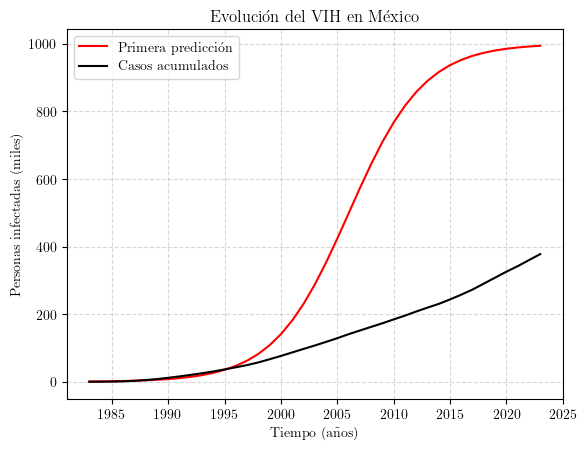

In [16]:
#Establecemos los parámetros iniciales
x0i=1
ai=0.3
bi=1000
#Para mostrar la figura en formate latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax=plt.subplots()
#Datos de primera predicción
guess1=Logistic2(time,x0i,ai,bi)
plt.plot(time,guess1,color="red",label="Primera predicción")
plt.plot(time,cumdata,color="black",label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas (miles)")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I1.pdf")

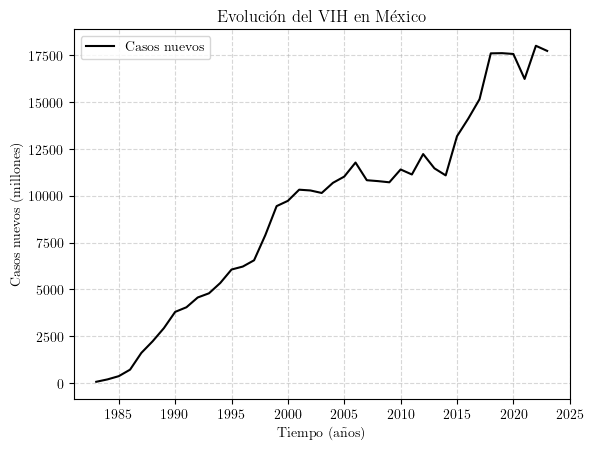

In [17]:
#Para mostrar la figura en formate latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax=plt.subplots()
#Datos de casos nuevos
plt.plot(time,data,color="black",label="Casos nuevos")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Casos nuevos (millones)")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I2.pdf")

In [26]:
n=10**6 #Número de iteraciones
sx=0.1 #Std del error de x
sa=0.001 #Std del error de a
sb=1 #Std del error de b
error_array=np.zeros(n) #Error cuadrático por cada iteración
success=0 #Contador de número de éxitos
#Valores que cambiarán para ajustar mejor los datos
#Los inicializamos con los valores iniciales
x0=x0i
a=ai
b=bi
xinitial=guess1
#Iteraremos n veces
for i in range(n):
    #Variable a la que mutaremos aleatoriamente
    #Si es 0 cambia x0, 1 cambia a y 2 cambia b
    choice=np.random.choice(3)
    #Se calcula el error inicial
    err0=error(xinitial,cumdata)
    error_array[i]=err0
    #Mutamos la variable escogida
    if choice==0:
        delta_x = np.random.normal(0,sx)   #Valor de la mutación     
        new_x=Logistic2(time,x0+delta_x,a,b) #Nuevos valores
        err1=error(new_x,cumdata)              #Nuevo error
        if err0>err1: #Si el nuevo error es menor, se mantiene la mutación
            xinitial=new_x  
            x0+=delta_x
            err0=err1
            success+=1  #Aumenta el número de éxitos
    if choice==1:
        delta_a = np.random.normal(0,sa)
        new_x=Logistic2(time,x0,a+delta_a,b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            a+=delta_a
            err0=err1
            success+=1
    if choice==2:
        delta_b = np.random.normal(0,sb)
        new_x=Logistic2(time,x0,a,b+delta_b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            b+=delta_b
            err0=err1
            success+=1

In [27]:
#Numero de éxitos y valor final de error
success,error_array[-1]

(323, 3247.851386209186)

In [29]:
#Parámetros que mejor ajustan la curva
x0,a,b

(9.744550722918763, 0.1254042693300826, 476.931458255788)

Imagen del primer resultado


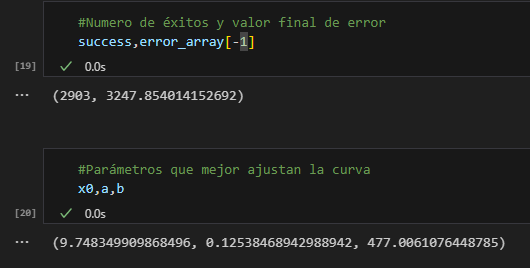

Imagen del segundo resultado

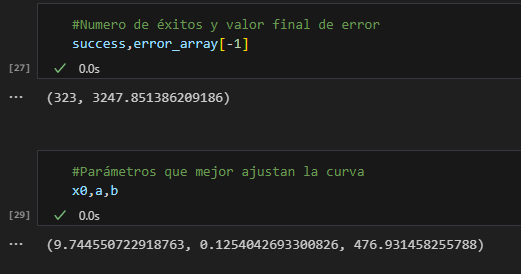

### Evolución del error

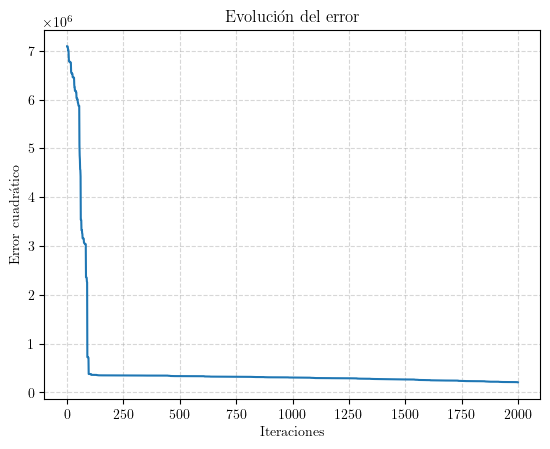

In [21]:
plt.plot(error_array[0:2000])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P2E1.pdf")

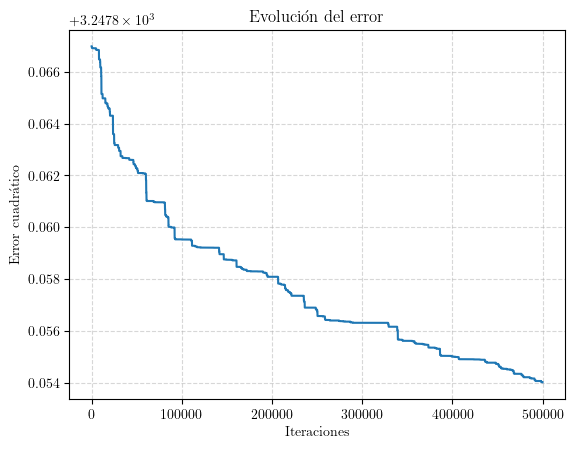

In [22]:
plt.plot(error_array[500000:])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P2E2.pdf")

### Ajuste final

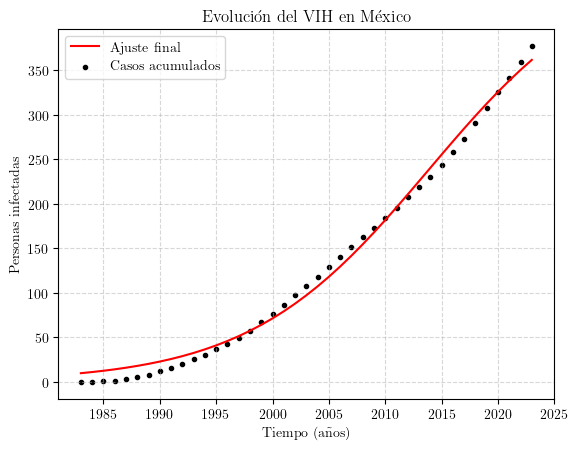

In [23]:
fig,ax=plt.subplots()
plt.plot(time,Logistic2(time,x0,a,b),color="red",label="Ajuste final")
plt.scatter(time,cumdata,color="black", marker='.',label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I3.pdf")

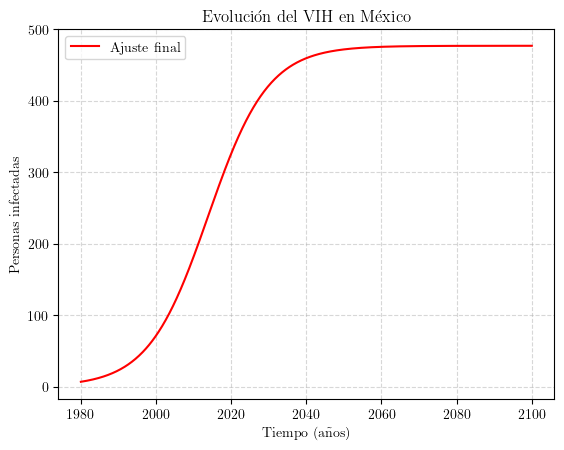

In [25]:
fig,ax=plt.subplots()
time1=np.linspace(1980,2100,1000)
plt.plot(time1,Logistic2(time1,x0,a,b),color="red",label="Ajuste final")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I4.pdf")

Para calcular el tiempo en el que  se demora en llegar al valor de saturación, tomaremos una tolerancia de 0.2 mil a b=476.9 mil

In [31]:
#Establecemos el valor de la población en 2023 como el último valor del ajuste
lim=new_x.to_numpy()[-1]
i=time.size
#Ciclo hasta que la diferencia entre el valor calculado y el límite de saturación
#sea menos a una tolerancia
while np.abs(lim-b)>0.2:
    #Se calcula la población al año i
    lim=Logistic2(i,x0,a,b)
    #para calcular la población el siguiente año
    i+=1

In [33]:
i,lim

(2077, 476.73466779836855)

In [34]:
# Cantidad de caso totales al 2023
cumdata[-1]

377.76499999999993